In [1]:
import numpy as np
from sklearn import datasets
import time
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
x,y = iris['data'],iris['target']

x, y = shuffle(x, y, random_state=0)
x, x_test, y, y_test = train_test_split(x, y, test_size=0.10, random_state=1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(x.shape[0],1)

num_labels = 3

x_std = ((x - np.mean(x,axis=0))/(np.std(x,axis=0)))
weights = np.random.rand(5,3)
x_std=np.hstack((x_std,np.ones((x_std.shape[0],1))))
y = (np.arange(num_labels)==y[:,None]).astype(np.float32)
yhat=np.dot(x_std,weights)
#yhat=sigmoid(yhat)
yhat=softmax(yhat)
cost = -np.multiply(np.log(yhat), y)
cost = np.mean(cost)
print(cost)

cost_plt=[]
acc_plt=[]

0.39595822414358944


0.01574263295523555


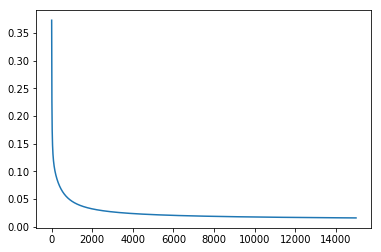

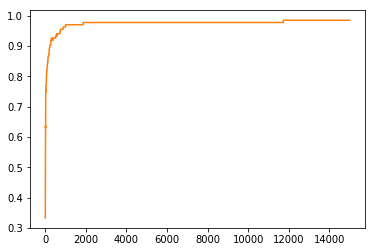

In [3]:
epochs = 15000
lr = 0.1
for i in range(epochs):
    a = np.multiply(yhat,(1- yhat))
    b = np.divide((-y),(yhat))
    y_up = np.multiply(a,b)
    weights = weights - (lr)*np.dot(np.transpose(x_std),y_up)/x_std.shape[0]
    yhat=np.dot(x_std,weights)
    yhat=softmax(yhat)
    cost = -np.multiply(np.log(yhat), y)
    cost = np.mean(cost)
    cost_plt.append(cost)
    acc = sum(np.argmax(y,axis=1)==np.argmax(yhat,axis=1))/x_std.shape[0]
    acc_plt.append(acc)

print(cost) 
print(acc, end='\r')
plt.plot(cost_plt)
plt.show()
plt.plot(acc_plt,color='C1')
plt.show()

In [4]:
x_test_std = ((x_test - np.mean(x,axis=0))/(np.std(x,axis=0)))
x_test_std=np.hstack((x_test_std,np.ones((x_test_std.shape[0],1))))
y_test = (np.arange(num_labels)==y_test[:,None]).astype(np.float32)
ypred=np.dot(x_test_std,weights)
ypredhat=softmax(ypred)

In [5]:
print(y_test)
print(ypredhat)
acc = sum(np.argmax(ypredhat,axis=1)==np.argmax(y_test,axis=1))/x_test_std.shape[0]
print(acc)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.05018356e-36 9.51878580e-01 4.81214198e-02]
 [5.51294052e-57 2.37338518e-01 7.62661482e-01]
 [1.00000000e+00 6.31235839e-22 8.91410457e-33]
 [1.63172499e-35 9.30339381e-01 6.96606193e-02]
 [2.59141550e-58 1.32670657e-03 9.98673293e-01]
 [8.30469984e-36 1.16311027e-01 8.83688973e-01]
 [1.16733001e-33 2.64820858e-01 7.35179142e-01]
 [1.00000000e+00 7.68545288e-27 8.12479361e-39]
 [1.00000000e+00 2.87038748e-21 1.17037521e-31]
 [1.00000000e+00 2.89438266e-31 2.68817541e-44]
 [3.13101735e-53 3.69338098e-03 9.96306619e-01]
 [8.97939594e-57 8.93903390e-06 9.99991061e-01]
 [5.03582211e-38 9.87317246e-01 1.26827541e-02]
 [3.43536663e-76 2.20597279e-04 9.99779403e-01]
 [1.00000000e+00 2.74079495e-28 3.71597358e-39]]
0.9333333333333333
